In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rc('axes', axisbelow=True)
SSSSSMALL_SIZE = 12
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SSSSSMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
login = os.getlogin( )
DATA_BASE = f"/home/{login}/Git/tc-hard/notebooks/notebooks.classification/results/"
FIGURE_BASE = f"/home/{login}/Git/tc-hard/notebooks/notebooks.classification-results/figures/"

In [7]:
df1 = pd.read_csv(DATA_BASE+"nettcr2.pep+cdr3b+cdr3a-drop-mhc.only-sampled-negs.hard-split.csv")
df2 = pd.read_csv(DATA_BASE+"nettcr2.pep+cdr3b+cdr3a-drop-mhc.only-sampled-negs.random-split.csv")
df3 = pd.read_csv(DATA_BASE+"nettcr2.pep+cdr3b+cdr3a-drop-mhc.full.hard-split.csv")
df4 = pd.read_csv(DATA_BASE+"nettcr2.pep+cdr3b+cdr3a-drop-mhc.full.random-split.csv")
df5 = pd.read_csv(DATA_BASE+"nettcr2.pep+cdr3b+cdr3a-drop-mhc.only-neg-assays.random-split.csv")

df1['Setting'] = 'RN | HS(RN)'
df2['Setting'] = 'RN | RS(RN)'
df3['Setting'] = 'RN+NA | HS(RN)'
df4['Setting'] = 'RN+NA | RS(RN+NA)'
df5['Setting'] = 'NA | RS(NA)'

results_df = pd.concat([df1, df2, df3, df4, df5])

In [8]:
results_df = results_df.rename(columns={'metrics': 'Metrics', 'score': 'Score'})
results_df = results_df.sort_values(by=['Setting'])
results_df = results_df.sort_values(by=['Metrics'])

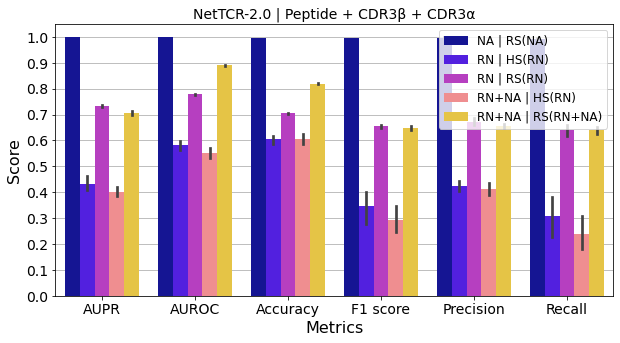

In [9]:
plt.rcParams['figure.figsize'] = [10, 5]
ax = sns.barplot(
    x="Metrics",
    y="Score", 
    hue="Setting", 
    data=results_df,
    palette=sns.color_palette("gnuplot2", 5)
)
ax.set_title('NetTCR-2.0 | Peptide + CDR3β + CDR3α')
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend = plt.legend(frameon = 1, loc='upper right')
frame = legend.get_frame()
frame.set_facecolor('white')
ax.grid(axis='y')
plt.yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim([0, 1.05])
plt.savefig(FIGURE_BASE + "nettcr2.pep+cdr3b+cdr3a-drop-mhc.png", format='png', dpi=300, bbox_inches='tight')